In [3]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing


In [4]:
# Load the California Housing dataset
housing = fetch_california_housing()

# Convert to Pandas DataFrame for easier manipulation
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add the target variable (house prices) to the DataFrame
df['PRICE'] = housing.target

# Display the first few rows of the dataset
print("Dataset Overview:")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1] - 1}")
print("\nFeature descriptions:")
for i, desc in enumerate(housing.feature_names):
    print(f"- {desc}")

df.head()

Dataset Overview:
Number of samples: 20640
Number of features: 8

Feature descriptions:
- MedInc
- HouseAge
- AveRooms
- AveBedrms
- Population
- AveOccup
- Latitude
- Longitude


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Display basic statistics of the dataset
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
corr_matrix

Correlation Matrix:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
PRICE,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


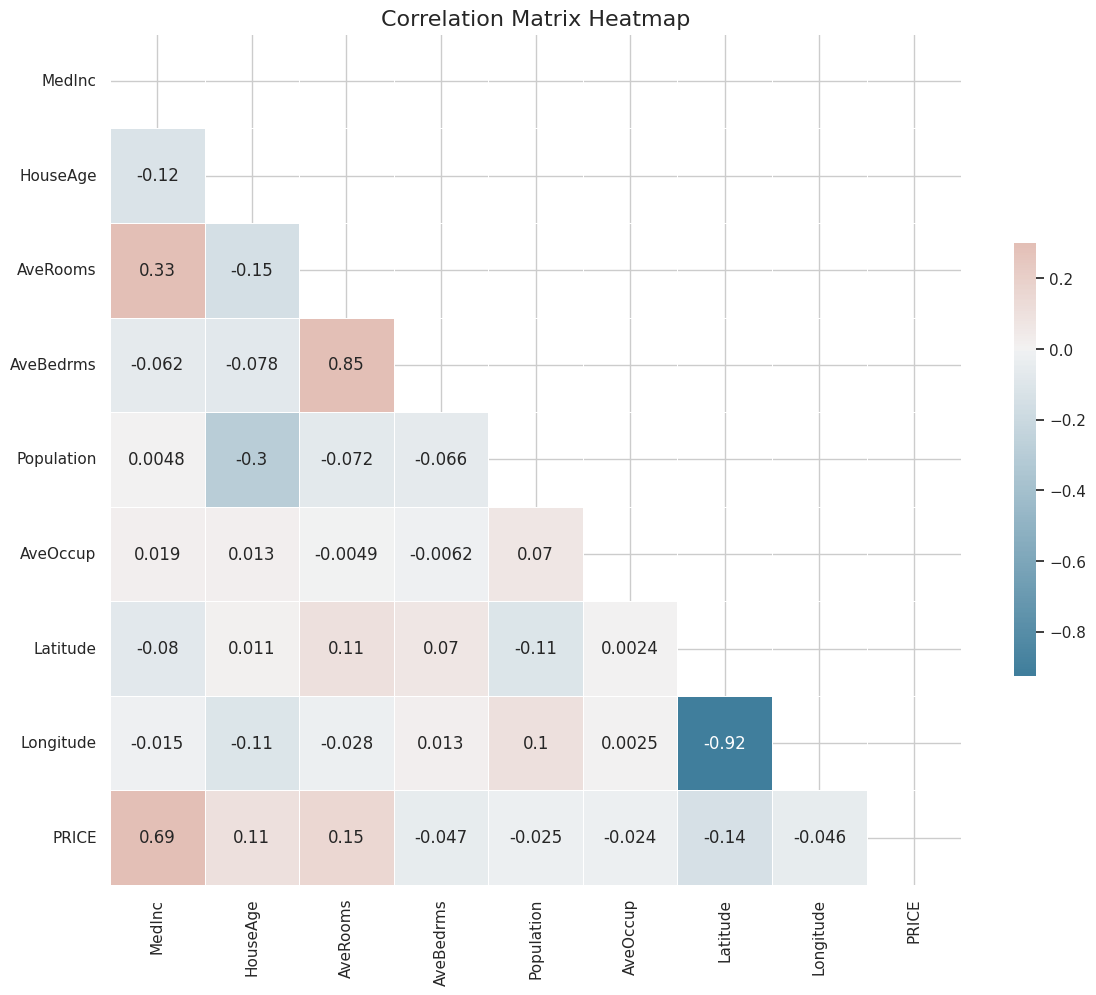

In [7]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Create a mask for the upper triangle

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

### Observations from Correlation Matrix:

- Features with strong positive correlations (values close to 1) indicate that as one feature increases, the other also tends to increase.
- Features with strong negative correlations (values close to -1) indicate that as one feature increases, the other tends to decrease.
- Features with correlations close to 0 have little to no linear relationship.

<Figure size 1200x800 with 0 Axes>

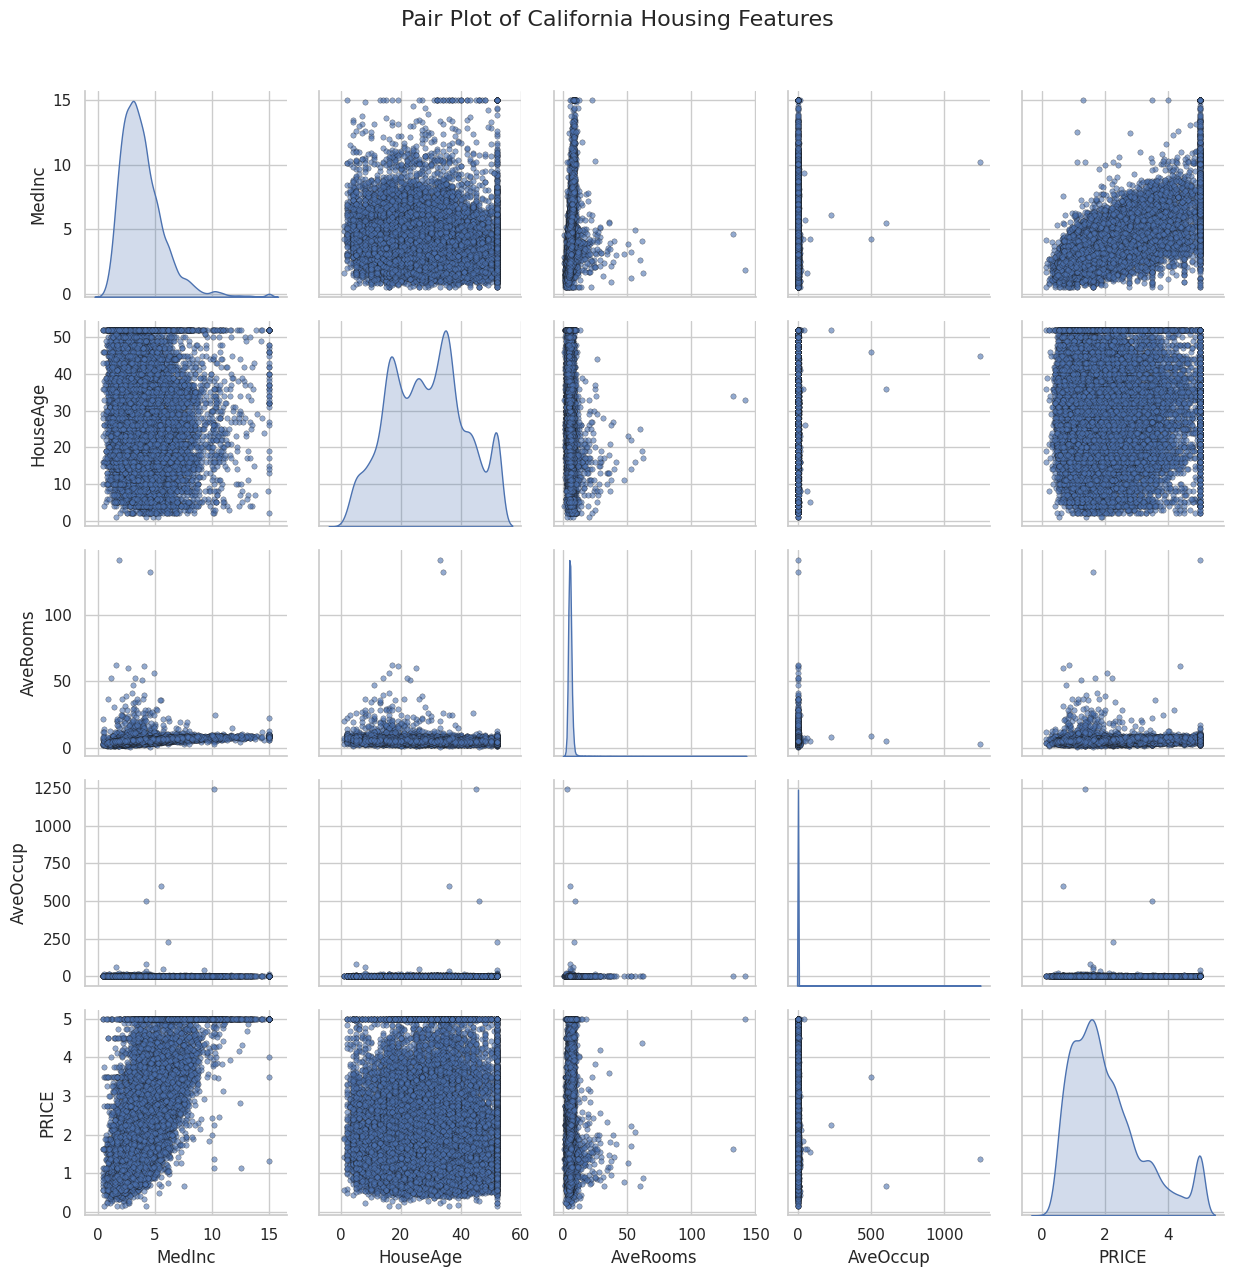

In [8]:
# Create a pair plot to visualize pairwise relationships
# Note: Using a subset of features to make the plot more readable
features_to_plot = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'PRICE']
plt.figure(figsize=(12, 8))
sns.pairplot(df[features_to_plot], height=2.5, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 15, 'edgecolor': 'k'})
plt.suptitle('Pair Plot of California Housing Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Optional: Create a more comprehensive pair plot with all features
# Warning: This may take a long time to render due to the number of features
# Uncomment the following code to run it

# plt.figure(figsize=(20, 15))
# sns.pairplot(df, height=2, plot_kws={'alpha': 0.5, 's': 10, 'edgecolor': 'k'})
# plt.suptitle('Comprehensive Pair Plot of California Housing Features', y=1.02, fontsize=16)
# plt.tight_layout()
# plt.show()

### Conclusions:

1. The correlation heatmap reveals relationships between different housing features.
2. The median income (`MedInc`) has the strongest positive correlation with housing prices.
3. The pair plot shows the distribution of each feature and the relationships between pairs of features.
4. Some features show clear linear relationships while others have more complex non-linear relationships.
5. This analysis helps understand which factors most strongly influence housing prices in California.